# Integrated Project 2:
---

- In this task, I am working with Zyfra and their gold ore purification data to:
    - Process the data
    - Perform an analysis
    - Develop and train a model
- The Data
    - Contains information throughout the purification process of gold ore
    - Each row is one full process and each column is a different input, stage, or output of the process
- Analysis
    - I will be looking at general data distribution, different statistical metrics, changes in metal concentration, input sizes and more during my analysis to better understand the puurification process
- Model Training
    - The model should predict the amount of gold recovered from gold ore
    - The model will help to optimize the production and eliminate unprofitable parameters
    - Use sMAPE (symmetric Mean Absolute Percentage Error) metric
- Action Plan
    - Confirm data quality and accuracy
    - Analyze stages in the process
    - Build and tune potential models based on sMAPE metric
    - Test final model on test dataset

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, recall_score, accuracy_score, f1_score, precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer

## Prepare the Data:
---

In [2]:
# Import datasets to pandas

# In local Jupyter
#train = pd.read_csv('gold_recovery_train.csv')
#test = pd.read_csv('gold_recovery_test.csv')
#full = pd.read_csv('gold_recovery_full.csv')

# In Practicum JupyterHub
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

print(train.shape)
print(test.shape)
print(full.shape)

(16860, 87)
(5856, 53)
(22716, 87)


In [3]:
# Confirm sum of rows in train and test equal full dataset

train.shape[0] + test.shape[0] == full.shape[0]

True

In [4]:
display(train.head(3))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


**Looking at columns with the most and fewest null values:**

In [5]:
train_nulls = pd.DataFrame(train.isna().sum()).sort_values(0)
display(train_nulls.tail(5))
display(train_nulls.head(5))

,0
secondary_cleaner.output.tail_sol,1986
rougher.output.tail_au,2249
rougher.output.tail_sol,2249
rougher.output.tail_ag,2250
rougher.output.recovery,2573


,0
date,0
primary_cleaner.input.feed_size,0
rougher.calculation.floatbank11_sulfate_to_au_feed,27
rougher.calculation.floatbank10_sulfate_to_au_feed,27
rougher.calculation.sulfate_to_au_concentrate,27


In [6]:
train1 = train.copy()
train = train.fillna(method='ffill')

In [7]:
display(test.head(3))

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [8]:
test.isna().sum().sort_values()

date                                            0
primary_cleaner.input.feed_size                 0
rougher.state.floatbank10_c_level              16
rougher.state.floatbank10_d_level              16
rougher.state.floatbank10_e_level              16
rougher.state.floatbank10_f_level              16
secondary_cleaner.state.floatbank2_a_level     16
secondary_cleaner.state.floatbank2_b_level     16
secondary_cleaner.state.floatbank3_a_level     16
secondary_cleaner.state.floatbank3_b_air       16
secondary_cleaner.state.floatbank3_b_level     16
secondary_cleaner.state.floatbank4_a_air       16
secondary_cleaner.state.floatbank4_a_level     16
secondary_cleaner.state.floatbank4_b_air       16
secondary_cleaner.state.floatbank4_b_level     16
secondary_cleaner.state.floatbank5_a_air       16
secondary_cleaner.state.floatbank5_a_level     16
secondary_cleaner.state.floatbank5_b_air       16
secondary_cleaner.state.floatbank5_b_level     16
secondary_cleaner.state.floatbank6_a_air       16


In [9]:
test = test.fillna(method='ffill')

- In both the train and test datasets, I filled the Null values using the forward fill method.
- This can be helpful for future calculations and analysis.
    - For example, if the value for Gold concentration is Null then we can take the prior result for that column in the time series and fill it in the Null position

#### Check recovery calculation for `rougher.output.recovery` using MAE:

In [10]:
recover_check = train1.copy()
recover_check = recover_check[['rougher.output.concentrate_au', 'rougher.input.feed_au',
                               'rougher.output.tail_au', 'rougher.output.recovery']]
recover_check.columns = ['C', 'F', 'T', 'rougher.output.recovery']

# Filtering out rows where input values = 0 which causes the calculation to = inf
recover_check = recover_check[(recover_check['C'] != 0) & (recover_check['F'] != 0) & (recover_check['T'] != 0)]
recover_check = recover_check.dropna()

# Calculated rougher.output.recovery
recover_check['calc_recov'] = ((recover_check['C'] * (recover_check['F'] - recover_check['T']))
                / (recover_check['F'] * (recover_check['C'] - recover_check['T']))) * 100

recover_check['diff'] = abs(recover_check['calc_recov'] - recover_check['rougher.output.recovery'])

recover_check.head()

,C,F,T,rougher.output.recovery,calc_recov,diff
0,19.793808,6.486150,1.170244,87.107763,87.107763,0.000000e+00
1,20.050975,6.478583,1.184827,86.843261,86.843261,1.421085e-14
2,19.737170,6.362222,1.162562,86.842308,86.842308,0.000000e+00
3,19.320810,6.118189,1.079755,87.226430,87.226430,0.000000e+00
4,19.216101,5.663707,1.012642,86.688794,86.688794,0.000000e+00


In [11]:
# Looking for absolute errors ('diff') greater than 1
recover_check[recover_check['diff'] > 1]

,C,F,T,rougher.output.recovery,calc_recov,diff


In [12]:
# Confirming there are no zeros, infs, Null values in the inputs
print(len(recover_check[(recover_check['C'] == 0) | (recover_check['F'] == 0) | (recover_check['T'] == 0)]))
print(len(recover_check[(recover_check['C'] == np.nan) | (recover_check['F'] == np.nan) | (recover_check['T'] == np.nan)]))
print(len(recover_check[(recover_check['C'] == np.inf) | (recover_check['F'] == np.inf) | (recover_check['T'] == np.inf)]))



0
0
0


In [13]:
print('MAE on rougher.output.recovery:', mean_absolute_error(
    recover_check['calc_recov'],
    recover_check['rougher.output.recovery']))


MAE on rougher.output.recovery: 9.661285240080234e-15


- Based on my Recovery Calculation:
    - No calculation already in the data is off by a significant amount.
    - The MAE found was 9.66e-15 (or ~0.00000000000000966)
    - This confirms quality in the rougher.output.recovery calculation in the training data

#### Features unavailable in the test set:

In [14]:
# Comparing training columns to test columns to see where they do not match

not_in_test = train.columns[~train.columns.isin(test.columns)]
print(not_in_test)
print(len(not_in_test))

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

- Differences in train and test set features:
    - The missing features (or columns) in the test set are all of the ones with the parmeter type: "output" or "calculation"
    - Using "output" or "calculation" features would overfit our model because it "outputs" are direct inputs into calculations that derive the final calculation values

In [15]:
# Need to make the training data the same as the test data that I want the model to predict

not_in_test = not_in_test.drop(['final.output.recovery', 'rougher.output.recovery'])
mtrain = train.drop(not_in_test, axis=1)

## Analyze the Data:
---

#### Metal Concentrations (Au, Ag, Pb) based on purification stages:

In [16]:
au_concentrate = train[['rougher.input.feed_au',
                        'rougher.output.concentrate_au',
                        'primary_cleaner.output.concentrate_au', 
                        'final.output.concentrate_au']]
ag_concentrate = train[['rougher.input.feed_ag',
                        'rougher.output.concentrate_ag',
                        'primary_cleaner.output.concentrate_ag',
                        'final.output.concentrate_ag']]
pb_concentrate = train[['rougher.input.feed_pb',
                        'rougher.output.concentrate_pb',
                        'primary_cleaner.output.concentrate_pb',
                        'final.output.concentrate_pb']]

In [17]:
au = pd.DataFrame(au_concentrate.mean()).reset_index()
au.columns = ['val1', 'au']

ag = pd.DataFrame(ag_concentrate.mean()).reset_index()
ag.columns = ['val2', 'ag']

pb = pd.DataFrame(pb_concentrate.mean()).reset_index()
pb.columns = ['val3', 'pb']


display(au)
display(ag)
display(pb)

,val1,au
0,rougher.input.feed_au,7.144279
1,rougher.output.concentrate_au,17.337662
2,primary_cleaner.output.concentrate_au,29.041786
3,final.output.concentrate_au,39.321631


,val2,ag
0,rougher.input.feed_ag,7.803825
1,rougher.output.concentrate_ag,10.541930
2,primary_cleaner.output.concentrate_ag,7.390585
3,final.output.concentrate_ag,4.699066


,val3,pb
0,rougher.input.feed_pb,3.188803
1,rougher.output.concentrate_pb,6.861249
2,primary_cleaner.output.concentrate_pb,8.493673
3,final.output.concentrate_pb,9.080638


In [18]:
concentrates_total = pd.concat([au, ag, pb], axis=1)
concentrates_total = concentrates_total.drop(['val1', 'val2', 'val3'], axis=1)

new_index = ['rougher.input.feed', 'rougher.output.concentrate',
             'primary_cleaner.output.concentrate', 'final.output.concentrate']
concentrates_total = concentrates_total.set_index(pd.Index(new_index))
concentrates_total


,au,ag,pb
rougher.input.feed,7.144279,7.803825,3.188803
rougher.output.concentrate,17.337662,10.541930,6.861249
primary_cleaner.output.concentrate,29.041786,7.390585,8.493673
final.output.concentrate,39.321631,4.699066,9.080638


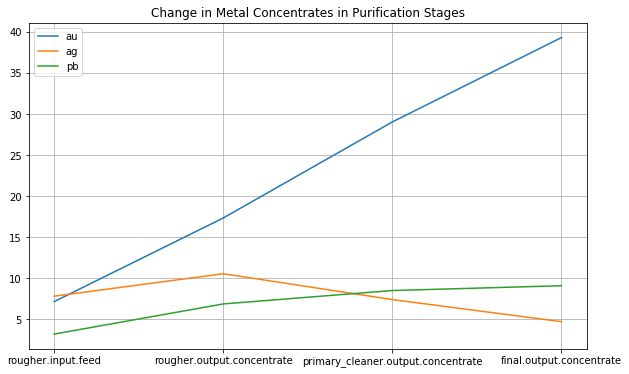

In [19]:
plt.figure(figsize=(10,6))
plt.plot(concentrates_total)
plt.grid(b=True)
plt.title('Change in Metal Concentrates in Purification Stages')
plt.legend(concentrates_total.columns)

- **As the process proceeds, we see changes in the concentrations of each metal:**
    - The concentration of gold (Au) increases during purification, this is expected because we are extracting gold from ore
    - The concentration of silver (Ag) decreases during purification
    - The concentration of lead (Pb) increases in each stage, but by very little each time

#### Comparing variation the feed particle size distributions in the training test data:

In [20]:
train_feed = train['rougher.input.feed_size']
test_feed = test['rougher.input.feed_size']
full_feed = pd.concat([train_feed, test_feed], axis=1)
full_feed.columns = ['train', 'test']
full_feed.head()

,train,test
0,55.486599,62.710452
1,57.278666,61.961163
2,57.510649,66.903807
3,57.792734,59.865919
4,56.047189,63.315324


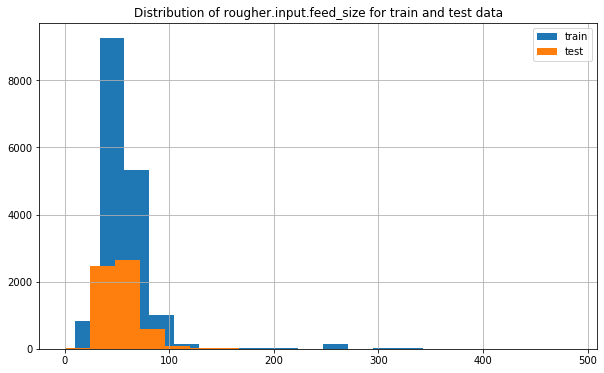

In [21]:
plt.figure(figsize=(10,6))
full_feed['train'].hist(bins=20)
full_feed['test'].hist(bins=20)
plt.title('Distribution of rougher.input.feed_size for train and test data')
plt.legend(full_feed.columns)

In [22]:
full_feed['train'].describe()

count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: train, dtype: float64

In [23]:
full_feed['test'].describe()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: test, dtype: float64

- **Train and Test data feed_size variation:**
    - Train Data:
        - Range ~475
        - Relatively normal distribution with a slight positive skew caused buy a few high outliers
        - Median ~54, Mean ~60
    - Test Data:
        - Range ~477
        - Relatively normal distribution with a slight positive skew caused buy a few high outliers
        - Median ~50, Mean ~56
    - Overall:
        - Very similar distributions despite training data having about 3x as many observations

#### Searching for abnormal values in the distribution of each substance concentration:

Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

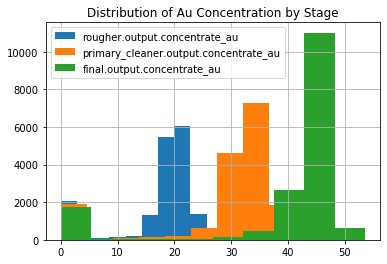

In [24]:
# Au Concentrate

au_leg = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
         'final.output.concentrate_au']

au_concentrate['rougher.output.concentrate_au'].hist()
au_concentrate['primary_cleaner.output.concentrate_au'].hist()
au_concentrate['final.output.concentrate_au'].hist()
plt.legend(au_leg)
plt.title('Distribution of Au Concentration by Stage')
plt.show()

In [25]:
au_below_ten = au_concentrate[au_concentrate['final.output.concentrate_au'] < 10]

au_zero1 = au_concentrate[au_concentrate['rougher.output.concentrate_au'] == 0]
au_zero2 = au_concentrate[au_concentrate['primary_cleaner.output.concentrate_au'] == 0]
au_zero3 = au_concentrate[au_concentrate['final.output.concentrate_au'] == 0]

print('Amount of Au Concentrate under 10:', len(au_below_ten), '| Percent of Total under 10:',
     (len(au_below_ten) / len(au_concentrate)))
print()
print('Amount of Au Concentrate equal to zero: \n Rougher Stage:', len(au_zero1),
      '| Primary_cleaner Stage:', len(au_zero2), '| Final Stage:', len(au_zero3))


Amount of Au Concentrate under 10: 1806 | Percent of Total under 10: 0.10711743772241993

Amount of Au Concentrate equal to zero: 
 Rougher Stage: 1547 | Primary_cleaner Stage: 1284 | Final Stage: 1320


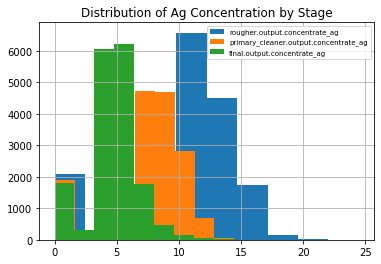

In [26]:
# Ag Concentrate

ag_leg = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag',
         'final.output.concentrate_ag']

ag_concentrate['rougher.output.concentrate_ag'].hist()
ag_concentrate['primary_cleaner.output.concentrate_ag'].hist()
ag_concentrate['final.output.concentrate_ag'].hist()
plt.legend(ag_leg, fontsize='x-small')
plt.title('Distribution of Ag Concentration by Stage')
plt.show()

In [27]:
ag_below_ten = ag_concentrate[ag_concentrate['final.output.concentrate_ag'] < 10]



ag_zero1 = ag_concentrate[ag_concentrate['rougher.output.concentrate_ag'] == 0]
ag_zero2 = ag_concentrate[ag_concentrate['primary_cleaner.output.concentrate_ag'] == 0]
ag_zero3 = ag_concentrate[ag_concentrate['final.output.concentrate_ag'] == 0]

print('Amount of Ag Concentrate under 10:', len(ag_below_ten), '| Percent of Total under 10:',
     (len(ag_below_ten) / len(ag_concentrate)))
print()
print('Amount of Ag Concentrate equal to zero: \n Rougher Stage:', len(ag_zero1),
      '| Primary_cleaner Stage:', len(ag_zero2), '| Final Stage:', len(ag_zero3))

Amount of Ag Concentrate under 10: 16685 | Percent of Total under 10: 0.9896204033214709

Amount of Ag Concentrate equal to zero: 
 Rougher Stage: 1547 | Primary_cleaner Stage: 1284 | Final Stage: 1320


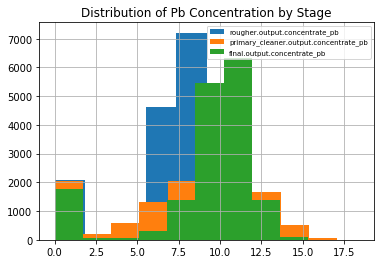

In [28]:
# Pb Concentrate

pb_leg = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',
         'final.output.concentrate_pb']

pb_concentrate['rougher.output.concentrate_pb'].hist()
pb_concentrate['primary_cleaner.output.concentrate_pb'].hist()
pb_concentrate['final.output.concentrate_pb'].hist()
plt.legend(pb_leg, fontsize='x-small', loc=1)
plt.title('Distribution of Pb Concentration by Stage')
plt.show()

In [29]:
pb_below_ten = pb_concentrate[pb_concentrate['final.output.concentrate_pb'] < 10]

pb_zero1 = pb_concentrate[pb_concentrate['rougher.output.concentrate_pb'] == 0]
pb_zero2 = pb_concentrate[pb_concentrate['primary_cleaner.output.concentrate_pb'] == 0]
pb_zero3 = pb_concentrate[pb_concentrate['final.output.concentrate_pb'] == 0]

print('Amount of Pb Concentrate under 10:', len(pb_below_ten), '| Percent of Total under 10:',
     (len(pb_below_ten) / len(pb_concentrate)))
print()
print('Amount of Pb Concentrate equal to zero: \n Rougher Stage:', len(pb_zero1),
      '| Primary_cleaner Stage:', len(pb_zero2), '| Final Stage:', len(pb_zero3))

Amount of Pb Concentrate under 10: 8202 | Percent of Total under 10: 0.4864768683274021

Amount of Pb Concentrate equal to zero: 
 Rougher Stage: 1547 | Primary_cleaner Stage: 1407 | Final Stage: 1320


- **Observations from metal distributions:**
    - I would expect there to be a portion of each metal where the concentration is minimal throughout which we see as each metal has less than 10 percent of observations with a concentration value under 10
    - On the other hand we have the same number of observations in each metal where concentration is equal to 0
        - This signals that the samples taken that were purified were bad and haad no samples of any ore or metals that we are tracking.
        - I would rather not remove this data as it is a part of the mining process where some samples do not contain any valuable resources

## Build the Model:
---

#### sMAPE Function:

In [30]:
# yi = actual
# yhat = predicted

def smape(yi, yhat):
    result = ((abs(yi - yhat) / ((abs(yi) + abs(yhat))/2)) * 100).mean()
    return result

In [31]:
# final sMAPE function

def final_smape(yi_rough, yhat_rough, yi_final, yhat_final):
    result = (0.25 * smape(yi_rough, yhat_rough)) + (0.75 * smape(yi_final, yhat_final))
    return result

**We need to predict two values:**
- rougher concentrate recovery `rougher.output.recovery`
- final concentrate recovery `final.output.recovery`

In [32]:
# split training data into train and validate so I can test models and parameters

features = mtrain.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
rough_target = mtrain['rougher.output.recovery']
final_target = mtrain['final.output.recovery']

xt_rough, xv_rough, yt_rough, yv_rough = train_test_split(features, rough_target, test_size=0.25, random_state=123)
xt_final, xv_final, yt_final, yv_final = train_test_split(features, final_target, test_size=0.25, random_state=123)

test_ml = test.drop('date', axis=1)

print(features.shape)
print(rough_target.shape)
print(final_target.shape)

(16860, 52)
(16860,)
(16860,)


In [33]:
test_target = full[['date', 'rougher.output.recovery', 'final.output.recovery']][full['date'].isin(test['date'])]
rough_model_target = test_target['rougher.output.recovery']
final_model_target = test_target['final.output.recovery']

print(test_ml.shape)
print(rough_model_target.shape)
print(final_model_target.shape)

(5856, 52)
(5856,)
(5856,)


#### Model Training using Cross-Validation:

In [34]:
%%time

# Reomving the Future Warnings to keep code cleaner
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# creating Scorer to use in Cross Val
smape_scorer = make_scorer(smape)

# Random Forest

for i in range(3, 7):
    rfmodel = RandomForestRegressor(random_state=123, max_depth=i)
    rf_rough = cross_val_score(rfmodel, features, rough_target, cv=5, scoring=smape_scorer)
    rf_final = cross_val_score(rfmodel, features, final_target, cv=5, scoring=smape_scorer)
    print('Depth:', i, '| rougher.output.recovery Score:', rf_rough.mean(), '| final.output.recovery Score:', rf_final.mean())

Depth: 3 | rougher.output.recovery Score: 17.062616649776558 | final.output.recovery Score: 14.072490848752349
Depth: 4 | rougher.output.recovery Score: 17.430983547063466 | final.output.recovery Score: 14.131448288603195
Depth: 5 | rougher.output.recovery Score: 17.238450069801928 | final.output.recovery Score: 14.000616771006609
Depth: 6 | rougher.output.recovery Score: 17.075860571501607 | final.output.recovery Score: 14.07046644698421
CPU times: user 1min 36s, sys: 4.96 ms, total: 1min 36s
Wall time: 1min 36s


In [35]:
# Best Random Forest sMAPE

# Predicting rougher.output.recovery (max_depth=6)
rf_rough = RandomForestRegressor(random_state=123, max_depth=6)
rf_rough.fit(xt_rough, yt_rough)
rfr_pred = rf_rough.predict(xv_rough)
rfr_score = smape(yv_rough, rfr_pred)

# Predicting final.output.recovery (max_depth=5)
rf_final = RandomForestRegressor(random_state=123, max_depth=5)
rf_final.fit(xt_final, yt_final)
rff_pred = rf_final.predict(xv_final)
rff_score = smape(yv_final, rff_pred)

print('rougher.output.recovery sMAPE:', rfr_score, '| final.output.recovery sMAPE:', rff_score)
print()
print('Overall Final sMAPE:', final_smape(yv_rough, rfr_pred, yv_final, rff_pred))

rougher.output.recovery sMAPE: 12.639017547295303 | final.output.recovery sMAPE: 11.460960383834987

Overall Final sMAPE: 11.755474674700066


In [36]:
%%time
# Decision Tree

for i in range (3, 6):
    dtmodel = DecisionTreeRegressor(random_state=123, max_depth=i)
    dt_rough = cross_val_score(dtmodel, features, rough_target, cv=5, scoring=smape_scorer)
    dt_final = cross_val_score(dtmodel, features, final_target, cv=5, scoring=smape_scorer)
    print('Depth:', i, '| rougher.output.recovery Score:', dt_rough.mean(), '| final.output.recovery Score:', dt_final.mean())

Depth: 3 | rougher.output.recovery Score: 17.227719011147418 | final.output.recovery Score: 14.681654739785571
Depth: 4 | rougher.output.recovery Score: 17.224204371842088 | final.output.recovery Score: 14.720631328243195
Depth: 5 | rougher.output.recovery Score: 18.042139294779325 | final.output.recovery Score: 14.901868515127267
CPU times: user 11.3 s, sys: 15.9 ms, total: 11.3 s
Wall time: 11.4 s


In [37]:
# Best Decision Tree sMAPE

# Predicting rougher.output.recovery (max_depth=4)
dt_rough = DecisionTreeRegressor(random_state=123, max_depth=4)
dt_rough.fit(xt_rough, yt_rough)
dtr_pred = dt_rough.predict(xv_rough)
dtr_score = smape(yv_rough, dtr_pred)

# Predicting final.output.recovery (max_depth=3)
dt_final = DecisionTreeRegressor(random_state=123, max_depth=3)
dt_final.fit(xt_final, yt_final)
dtf_pred = dt_final.predict(xv_final)
dtf_score = smape(yv_final, dtf_pred)

print('rougher.output.recovery sMAPE:', dtr_score, '| final.output.recovery sMAPE:', dtf_score)
print()
print('Overall Final sMAPE:', final_smape(yv_rough, dtr_pred, yv_final, dtf_pred))

rougher.output.recovery sMAPE: 15.672597167175574 | final.output.recovery sMAPE: 12.815255170322281

Overall Final sMAPE: 13.529590669535605


**Model Testing Follow-up:**
- I iterated through the max_depth parameter for both the random forest and decision tree model to find the optimal parameter value
- Then using the best for each I called the predict function and calculated their sMAPE
- The **Random Forest** model with a max_depth of 6 for the rougher.output.recovery and a max_depth of 5 for the final.output.recovery had the lowest sMAPE values
- When calculating the final sMAPE, I found that again the Random Forest had the better metric

#### Finalized Model and Testing:

In [38]:
# Final Model Test Predictions

final_rough_pred = rf_rough.predict(test_ml)
print('rougher.output.recovery sMAPE:', smape(rough_model_target, final_rough_pred))
print('---')

final_final_pred = rf_final.predict(test_ml)
print('final.output.recovery sMAPE:', smape(final_model_target, final_final_pred))
print('---')
print('Final sMAPE:', final_smape(rough_model_target, final_rough_pred, final_model_target, final_final_pred))

rougher.output.recovery sMAPE: 9.839325728297874
---
final.output.recovery sMAPE: 10.091505685807162
---
Final sMAPE: 10.028460696429839


## Conclusion:
---

- **Final Testing:**
    - Model Used:
        - Random Forest with max_depths of 6 for the rougher and 5 for the final
        - Random Forest had better validation than the Decision Tree on the Validation Set
    - Final Test Results:
        - `rougher.output.recovery` sMAPE: 9.8
        - `final.output.recovery` sMAPE: 10.1
        - Final sMAPE: 10.0